In [1]:
import cv2
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.insert(0, '../StackMix-OCR')
from src.stackmix import StackMix
from configs import CONFIGS
from src.ctc_labeling import CTCLabeling  # noqa

In [2]:
DATASET_NAME = 'bentham'
DATA_DIR = '../StackMix-OCR-DATA'
MWE_TOKENS_DIR = '../StackMix-OCR-MWE_TOKENS'
IMAGE_H = 128

In [3]:
stackmix = StackMix(
    mwe_tokens_dir=MWE_TOKENS_DIR,
    data_dir=DATA_DIR,
    dataset_name=DATASET_NAME,
    image_h=IMAGE_H,
    p_background_smoothing=1.0
)

In [4]:
# marking = pd.read_csv(f'{DATA_DIR}/{DATASET_NAME}/marking.csv', index_col='sample_id')
# stackmix.prepare_stackmix_dir(marking=marking)

In [5]:
stackmix.load()

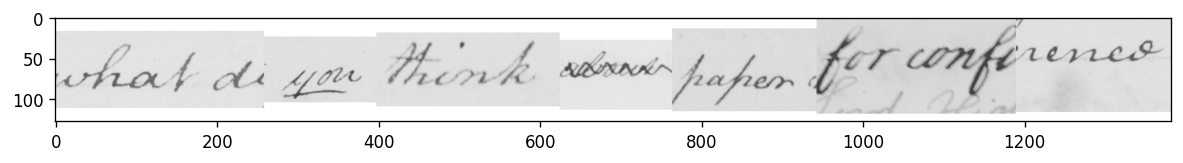

In [6]:
text = 'what do you think about paper for conference'

image = stackmix.run_stackmix(text, tokenizer=stackmix.tokenizers[8])

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [7]:
config = CONFIGS[DATASET_NAME](DATA_DIR, '', '')
ctc_labeling = CTCLabeling(config)
stackmix.load_corpus(ctc_labeling, f'{DATA_DIR}/corpora/{config.corpus_name}')

100%|██████████| 563980/563980 [00:13<00:00, 41838.89it/s]


You should have your illness looked at by a professional, just some friendly advice.


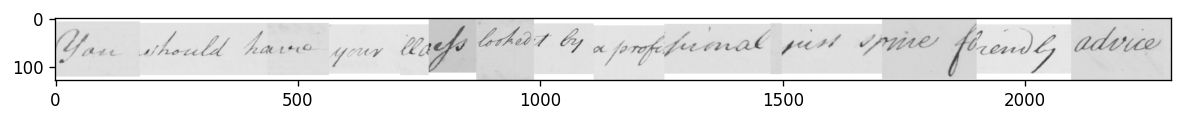

In [8]:
text, image = stackmix.run_corpus_stackmix(tokenizer=stackmix.tokenizers[8])

print(text)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);